In [88]:
## Importing Packages
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf # linear modeling
import matplotlib.pyplot as plt # plotting
import matplotlib.lines as mlines
import statsmodels.api as sm
import seaborn as sns
import warnings

In [92]:
## Loading Data
por = pd.read_csv("student-alcohol-consumption/student-mat.csv")
math = pd.read_csv("student-alcohol-consumption/student-por.csv")

In [93]:
## Combining 2 dataframe
df = pd.concat([por,math], sort= True, ignore_index=False)

In [94]:
## Make a copy of the dataframe for statistical analysis
df_stats = df



In [96]:
## Changing numeric variables to categorical variables

df_stats['internet'] = df_stats.internet.factorize( ['yes', 'no'] )[0]
df_stats['activities'] = df_stats.activities.factorize( ['yes', 'no'] )[0]
df_stats['romantic'] = df_stats.romantic.factorize( ['yes', 'no'] )[0]
df_stats["Dalc"] = df_stats["Dalc"].values
df_stats["goout"] = df_stats["goout"].values.astype(str).astype(int)

## Creating new variables "social index"
df_stats["index"] = df_stats['goout'] * 0.25 + df_stats['internet'] * 0.02 + df_stats['romantic'] * 0.03 + df_stats['activities'] * -0.01

## Creating new variables "drinking index"
df_stats["drinking"] = (df_stats["Walc"] * 5 + df_stats["Dalc"] * 2) / 7 









In [86]:
df_stats['Dalc'] = df_stats.Dalc.astype('category')
df_stats['Walc'] = df_stats.Walc.astype('category')
df_stats['health'] = df_stats.health.astype('category')
df_stats['goout'] = df_stats.goout.astype('category')
df_stats['freetime'] = df_stats.freetime.astype('category')
df_stats['famrel'] = df_stats.famrel.astype('category')
df_stats['studytime'] = df_stats.studytime.astype('category')
df_stats['traveltime'] = df_stats.traveltime.astype('category')
df_stats['Fedu'] = df_stats.Fedu.astype('category')
df_stats['Medu'] = df_stats.Medu.astype('category')

df_stats.shape

(1044, 37)

Text(0.5, 1.0, 'Correlation Matrix')

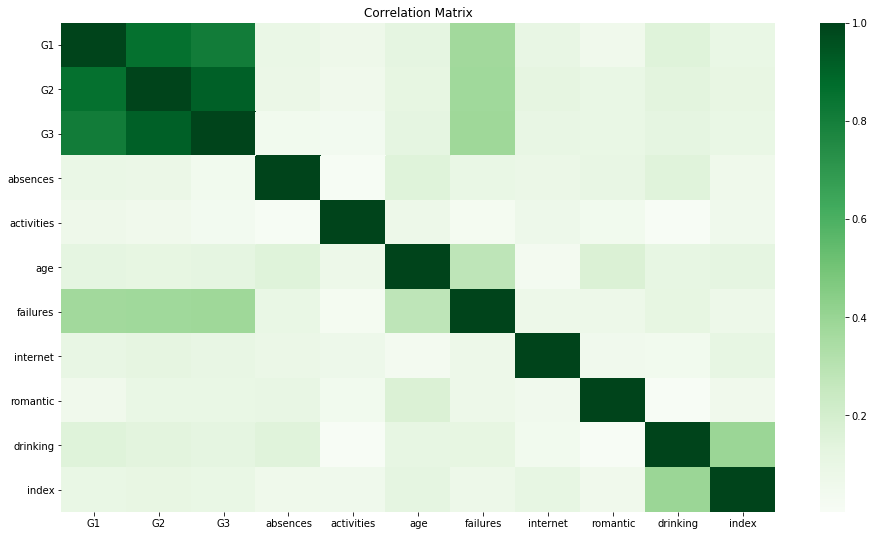

In [70]:
plt.figure(figsize=(16,9))
sns.heatmap(df_stats.corr().abs(), cmap="Greens").set_title('Correlation Matrix')
#plt_corr_dengue.savefig('data/img/correlation_dengue.png', dpi=plt_corr_dengue.dpi)

In [71]:
lm = smf.ols(formula='drinking ~ school + sex + age + address + Pstatus + Medu + Fedu + Mjob + Fjob + reason + guardian + traveltime + studytime + failures + schoolsup + famsup + paid + activities + nursery + higher + internet + romantic + famrel + freetime + goout + health + absences + Course + G1 + G2 + G3 + index', data = df_stats).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               drinking   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     10.04
Date:                Sat, 09 Mar 2019   Prob (F-statistic):           5.42e-69
Time:                        16:22:05   Log-Likelihood:                -1324.2
No. Observations:                1044   AIC:                             2774.
Df Residuals:                     981   BIC:                             3086.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0491      0.692      0.071      0.943      -1.310       1.408
school[T.MS]            -0.0247      0.080     -0.308      0.758      -0.182       0.133
sex[T.M]                 0.5785      0.064      9.058      0.000       0.453       0.704
address[T.U]            -0.0899      0.072     -1.244      0.214      -0.232       0.052
Pstatus[T.T]            -0.0030      0.092     -0.033      0.974      -0.184       0.178
Medu[T.1]               -0.4951      0.317     -1.562      0.119      -1.117       0.127
Medu[T.2]               -0.7427      0.318     -2.338      0.020      -1.366      -0.119
Medu[T.3]               -0.5564      0.322     -1.730      0.084      -1.188       0.075
Medu[T.4]               -0.7202      0.331     -2.177      0.030      -1.370      -0.071
Fedu[T.1]                0.9746      0.313      3.115      0.002       0.361       1.589
Fedu[T.2]                0.9846      0.315      3.122      0.002       0.366       1.603
Fedu[T.3]                0.9908      0.319      3.105      0.002       0.365       1.617
Fedu[T.4]                1.0981      0.326      3.366      0.001       0.458       1.738
Mjob[T.health]          -0.1133      0.147     -0.773      0.440      -0.401       0.175
Mjob[T.other]           -0.1252      0.086     -1.461      0.144      -0.293       0.043
Mjob[T.services]        -0.0702      0.102     -0.689      0.491      -0.270       0.130
Mjob[T.teacher]          0.1071      0.139      0.771      0.441      -0.166       0.380
Fjob[T.health]           0.0755      0.197      0.383      0.702      -0.312       0.463
Fjob[T.other]            0.2310      0.127      1.823      0.069      -0.018       0.480
Fjob[T.services]         0.4249      0.132      3.209      0.001       0.165       0.685
Fjob[T.teacher]         -0.1963      0.181     -1.087      0.277      -0.551       0.158
reason[T.home]           0.0606      0.075      0.810      0.418      -0.086       0.208
reason[T.other]          0.2551      0.100      2.553      0.011       0.059       0.451
reason[T.reputation]     0.1065      0.078      1.364      0.173      -0.047       0.260
guardian[T.mother]      -0.1197      0.072     -1.666      0.096      -0.261       0.021
guardian[T.other]       -0.3130      0.136     -2.295      0.022      -0.581      -0.045
traveltime[T.2]         -0.0960      0.067     -1.440      0.150      -0.227       0.035
traveltime[T.3]          0.0844      0.119      0.707      0.480      -0.150       0.319
traveltime[T.4]          0.6384      0.200      3.193      0.001       0.246       1.031
studytime[T.2]          -0.2382      0.071     -3.340      0.001      -0.378      -0.098
studytime[T.3]          -0.3157      0.099     -3.195      0.001      -0.510      -0.122
studytime[T.4]          -0.3672      0.136     -2.695    

In [10]:
df_stats.corr().abs()

,Dalc,G1,G2,G3,Walc,absences,age,failures,index
Dalc,1.000000,0.150943,0.131576,0.129642,0.627814,0.132867,0.133453,0.116336,0.137548
G1,0.150943,1.000000,0.858739,0.809142,0.142401,0.092425,0.124121,0.374175,0.082712
G2,0.131576,0.858739,1.000000,0.910743,0.128114,0.089332,0.119475,0.377172,0.098619
G3,0.129642,0.809142,0.910743,1.000000,0.115740,0.045671,0.125282,0.383145,0.099790
Walc,0.627814,0.142401,0.128114,0.115740,1.000000,0.139703,0.098291,0.107432,0.208790
absences,0.132867,0.092425,0.089332,0.045671,0.139703,1.000000,0.153196,0.099998,0.037303
age,0.133453,0.124121,0.119475,0.125282,0.098291,0.153196,1.000000,0.282364,0.066147
failures,0.116336,0.374175,0.377172,0.383145,0.107432,0.099998,0.282364,1.000000,0.066431
index,0.137548,0.082712,0.098619,0.099790,0.208790,0.037303,0.066147,0.066431,1.000000


In [78]:
df_stats['prediction'] = pd.DataFrame(lm.predict())

In [81]:
df_stats['drinking']

0      1.000000
1      1.000000
2      2.714286
3      1.000000
4      1.714286
5      1.714286
6      1.000000
7      1.000000
8      1.000000
9      1.000000
10     1.714286
11     1.000000
12     2.428571
13     1.714286
14     1.000000
15     1.714286
16     1.714286
17     1.000000
18     3.428571
19     2.428571
20     1.000000
21     1.000000
22     2.428571
23     3.428571
24     1.000000
25     2.428571
26     1.714286
27     3.428571
28     1.000000
29     5.000000
         ...   
619    2.428571
620    1.000000
621    1.714286
622    3.428571
623    2.000000
624    1.714286
625    1.714286
626    2.571429
627    2.714286
628    1.000000
629    2.428571
630    1.000000
631    1.714286
632    1.000000
633    3.714286
634    1.714286
635    2.714286
636    3.142857
637    2.428571
638    1.000000
639    2.428571
640    3.285714
641    2.428571
642    1.000000
643    2.000000
644    1.714286
645    1.000000
646    1.000000
647    3.714286
648    3.714286
Name: drinking, Length: 

(0, 6)

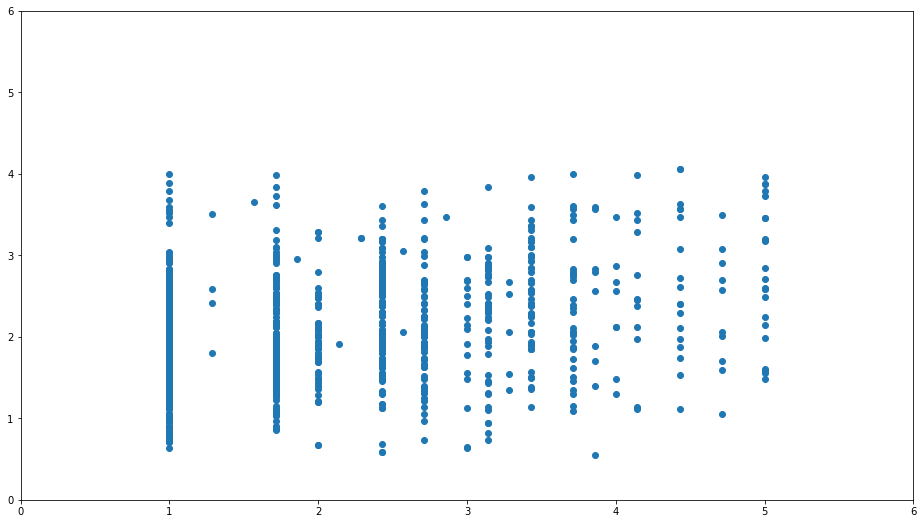

In [85]:
plt.figure(figsize=(16,9))
plt.scatter(df_stats.drinking, df_stats.prediction)
plt.xlim(0, 6)
plt.ylim(0, 6)